# Assignment 1

First we need to import a few modules, execute the cell below:

In [ ]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [10]:
import numpy  
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return numpy.cos(x)
f2=numpy.vectorize(f)
x=numpy.array([0.1,0.2,0.3])
print(f(x))

[0.99500417 0.98006658 0.95533649]


You can use the following cell to check that your code works for scalar arguments:

In [11]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [12]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [14]:
def df_analytic(x):
       return numpy.sin(-x)
f3=numpy.vectorize(df_analytic(x))
x=numpy.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
print(df_analytic(x))

[-0.09983342 -0.19866933 -0.29552021 -0.38941834 -0.47942554 -0.56464247
 -0.64421769]


In [ ]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [ ]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [15]:
def backward_difference(f, x, dx):
    return (f(x)-f(x-dx))/dx
print (backward_difference(f,0.1,0.0001))

-0.09978366627194646


In [ ]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


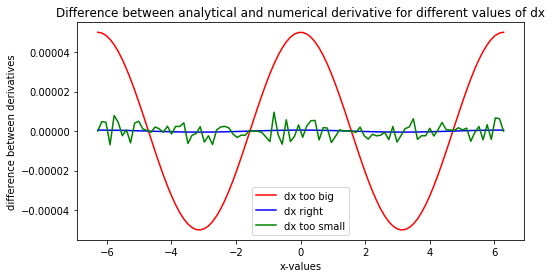

In [58]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-11)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical,color='red',label='dx too big')
plt.plot(xs, df_dx_2 - df_dx_analytical,color='blue',label='dx right')
plt.plot(xs, df_dx_3 - df_dx_analytical,color='green',label='dx too small')
plt.xlabel("x-values")
plt.ylabel("difference between derivatives")
plt.title("Difference between analytical and numerical derivative for different values of dx")
plt.legend(loc='best')


**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


In the case where Δx is too large: the numerical method approximates the analytical derivative inaccurately because the analytical definition of a derivative is only valid in the vicinity of x0. The deivative of a function is analytically defined as: the limit as h tends to zero of [f(x0 + Δx)-f(x0)]/Δx.
The error is (approximately) proportional to Δx, hence, in the case of Δx being too large, the error is also very large and so the approximation is inaccurate. For numerical application, computers store numbers with a finite precision. due to limited memory available and limited processing power. When Δx is too small, the precision can turn out to be insufficent and so the computer is unable to carry out the calculation without loss, i.e. the result is "corrupted" and thus imprecise.